The goal of this notebook is:
1. understand basic tensor in Pytorch and understand neural networks
2. train a simple neural network using Pytorch.

# What is Pytorch

1. a replacement of numpy
2. a deep learning platform

## Tensors

In [1]:
import torch


construct matrix uninitialized

In [2]:
x = torch.empty(3,5)
print(x)

tensor([[                                0.0000,
                                        -2.0000,
                             -721782964224.0000,
                               -8592027648.0000,
                                         0.0000],
        [                                0.0000,
                                         0.0000,
                                         0.0000,
         -70741735374327006795908138401792.0000,
                                         0.0000],
        [                                0.0000,
                                         0.0000,
                                         0.0000,
                                         0.0000,
                             -721687281664.0000]])


random matrix

In [3]:
x = torch.rand(5,3)
print(x)

tensor([[0.3237, 0.5367, 0.2025],
        [0.5787, 0.2415, 0.3374],
        [0.5662, 0.9899, 0.5620],
        [0.8118, 0.6365, 0.8015],
        [0.7641, 0.1177, 0.8615]])


In [4]:
x = torch.zeros(5,3, dtype=torch.long)
print(x)
print(type(x))
print(type(x[0][0]))

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
<class 'torch.Tensor'>
<class 'torch.Tensor'>


construct directly from data

In [5]:
x = torch.Tensor([3,4,5])
print(x)

tensor([3., 4., 5.])


In [6]:
print(x.size())

torch.Size([3])


construct new tensor based on old one

In [7]:
x = x.new_ones(3,3, dtype=torch.double)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [8]:
x = torch.ones_like(x, dtype=torch.int32)
print(x)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int32)


In [9]:
x = torch.randn_like(x, dtype=torch.float32)
print(x)
print(x.size())

tensor([[ 1.1480, -2.0721,  1.8282],
        [ 0.2134, -0.4376,  2.0118],
        [ 0.7425,  0.9290, -0.6039]])
torch.Size([3, 3])


In [10]:
x = torch.rand(3,4,4)
print(x)
print(x.size())

tensor([[[0.0796, 0.2789, 0.9946, 0.8904],
         [0.9633, 0.9282, 0.5331, 0.3320],
         [0.7257, 0.8744, 0.6534, 0.0860],
         [0.6667, 0.4911, 0.2808, 0.0037]],

        [[0.8576, 0.4895, 0.1684, 0.8730],
         [0.7089, 0.8815, 0.8661, 0.7686],
         [0.7680, 0.9903, 0.0249, 0.3507],
         [0.8231, 0.9657, 0.6666, 0.5170]],

        [[0.9376, 0.6008, 0.8627, 0.0435],
         [0.6794, 0.7389, 0.0770, 0.9726],
         [0.0746, 0.4947, 0.4803, 0.0536],
         [0.1309, 0.1714, 0.9006, 0.0183]]])
torch.Size([3, 4, 4])


## operations

In [11]:
x = torch.rand(5,3)
y = torch.ones(5,3)
print(x)
print(y)
print(x+y)

tensor([[0.6308, 0.1683, 0.0372],
        [0.3490, 0.2137, 0.1213],
        [0.5321, 0.4935, 0.6786],
        [0.5447, 0.5786, 0.5905],
        [0.7402, 0.1833, 0.2643]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1.6308, 1.1683, 1.0372],
        [1.3490, 1.2137, 1.1213],
        [1.5321, 1.4935, 1.6786],
        [1.5447, 1.5786, 1.5905],
        [1.7402, 1.1833, 1.2643]])


In [12]:
# or use torch.add
print(torch.add(x,y))

tensor([[1.6308, 1.1683, 1.0372],
        [1.3490, 1.2137, 1.1213],
        [1.5321, 1.4935, 1.6786],
        [1.5447, 1.5786, 1.5905],
        [1.7402, 1.1833, 1.2643]])


output to some variable

In [13]:
result = torch.empty(5,3)
torch.add(x, y, out=result)
print(result)

tensor([[1.6308, 1.1683, 1.0372],
        [1.3490, 1.2137, 1.1213],
        [1.5321, 1.4935, 1.6786],
        [1.5447, 1.5786, 1.5905],
        [1.7402, 1.1833, 1.2643]])


In [14]:
# another way is to add inplace
# Any operation that mutates a tensor in-place is post-fixed with an _. 
# For example: x.copy_(y), x.t_(), will change x.
#y.add_(x)
#print(y)


get part of tensor. similar to numpy

In [15]:
# second column of x
print(x[:, 1])

tensor([0.1683, 0.2137, 0.4935, 0.5786, 0.1833])


reshape the tensor

In [16]:
x = torch.rand(4,4)
y = x.view(1,16)
z = x.view(-1, 2) # -1 means the size will be inferred by other dimensions
print(x)
print(y)
print(z)
print(x.size(), y.size(), z.size())

tensor([[0.5772, 0.6867, 0.6494, 0.1506],
        [0.5549, 0.0668, 0.4300, 0.0382],
        [0.2834, 0.0151, 0.5922, 0.8631],
        [0.5196, 0.3465, 0.7036, 0.2252]])
tensor([[0.5772, 0.6867, 0.6494, 0.1506, 0.5549, 0.0668, 0.4300, 0.0382, 0.2834,
         0.0151, 0.5922, 0.8631, 0.5196, 0.3465, 0.7036, 0.2252]])
tensor([[0.5772, 0.6867],
        [0.6494, 0.1506],
        [0.5549, 0.0668],
        [0.4300, 0.0382],
        [0.2834, 0.0151],
        [0.5922, 0.8631],
        [0.5196, 0.3465],
        [0.7036, 0.2252]])
torch.Size([4, 4]) torch.Size([1, 16]) torch.Size([8, 2])


get the value of tensor

In [17]:
print(x[1][1])
print(x[1][1].item())
# print(x.item()) # only one element of tensor can be converted to Python scalars

tensor(0.0668)
0.06684494018554688


## Numpy bridge

The torch and numpy will share underlying memory locations, and change one will change the other.

In [18]:
x = torch.Tensor([1,2,3,4])
print(x)

tensor([1., 2., 3., 4.])


In [19]:
y = x.numpy()
print(y)

[1. 2. 3. 4.]


In [20]:
x.add_(1)
print(x)
print(y)

tensor([2., 3., 4., 5.])
[2. 3. 4. 5.]


In [21]:
import numpy as np
y = np.ones(4)
x = torch.from_numpy(y)
print(x)

tensor([1., 1., 1., 1.], dtype=torch.float64)


In [22]:
y = np.add(y, 1) # y is not the same y as before. so y and x are now not the same variable. 
                 # Pay attention to this!!!!!!
print(y)
print(x)

[2. 2. 2. 2.]
tensor([1., 1., 1., 1.], dtype=torch.float64)


In [23]:
np.add(y, 1, out=y)
print(y)
print(x)

[3. 3. 3. 3.]
tensor([1., 1., 1., 1.], dtype=torch.float64)


In [24]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## CUDA Tensors

In [25]:
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device('cuda') # cuda device object
    y = torch.ones(3,3, device=device) # assign device to cuda
    x = torch.ones(3,3)
    x.to(device) # also can use .to(device)
    z = x+y
    print(z)
    print(z.to('cpu', torch.double))
    

# Autograd automatic differentiation

## Tensor

when you set attribute `.requires_grad` to `True`, the pytorch will track the operations, and when you do `.backward()`, it will compute the gradients automatically. You can use `.grad` or `.grad_fn` to get the gradient. `.grad_fn` for function.

To un-track the gradients, use `.detach()`. 

when evaluate, you do not need gradient, so use `with torch.no_grad():`

In [26]:
import torch

In [27]:
x = torch.ones(3,3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [28]:
y = x + 2
print(y)
print(y.grad_fn)

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<AddBackward>)


In [29]:
z = y*y*3
out = z.mean()
print(z, out)

tensor([[27., 27., 27.],
        [27., 27., 27.],
        [27., 27., 27.]], grad_fn=<MulBackward>) tensor(27., grad_fn=<MeanBackward1>)


In [30]:
a = torch.rand(3,3)
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)

False
True


## Gradient

In [31]:
x = torch.ones(2,3, requires_grad=True)
y = x+2
z = y*y*3
out = z.mean()
out.backward()
print(x.grad)

tensor([[3., 3., 3.],
        [3., 3., 3.]])


In [32]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


# Neural Networks

This section we will use how to create a neural network using `torch.nn`.

For a typical training procedure, there are probably these steps:
* define the network, initial the weights
* iterate over a dataset of inputs
* process input through the network
* compute the loss
* propagate gradients back into the network's weights
* update weight

## define the network

First, define a simple convolutional neural network

![alexnet](./mnist.png)

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    # 1. the "__init__" defines what layers you want to use
    # 2. the "forward" defines the structure of the network, namely how the data flows
    # 3. the pytorch will do the gradient automatically, generally you do not have to define
    # backward path.
    # 4. and other helper fuctions as needed.
    
    def __init__(self):
        super(Net, self).__init__()
        # kernel, input 1, output channel 6, kernel size 5
        self.conv1 = nn.Conv2d(1, 6, 5)
        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # feed forward layer
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # max pooling over 2*2 window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        # if max pooling window size is square, can specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Now lets print the parameters

In [34]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's weight

10
torch.Size([6, 1, 5, 5])


let's try a random input.

From the network shown above, we know the input size is 32*32

In [35]:
input_pic = torch.randn(1,1,32,32)
out = net(input_pic)
print(out)

tensor([[-0.0814,  0.1121, -0.0654, -0.0244, -0.0667, -0.0930,  0.0211,  0.0687,
          0.1011, -0.0802]], grad_fn=<ThAddmmBackward>)


Zero the gradient buffers of all parameters and backprops with random gradients:

In [36]:
net.zero_grad()
out.backward(torch.randn(1,10))

`torch.nn` only supports mini-batches. The entire `torch.nn` package only supports inputs that are a mini-batch of samples, and not a single sample.

For example, `nn.Conv2d` will take in a 4D Tensor of `nSamples x nChannels x Height x Width`.

If you have a single sample, just use `input.unsqueeze(0)` to add a fake batch dimension.

## Loss Function

There are several loss functions under the `nn` package. For example, `nn.MSELoss`.

In [37]:
out = net(input_pic)
target = torch.randn(10)
target = target.view(1, -1) # make it the same shape as out
criterion = nn.MSELoss()
loss = criterion(out, target)
print(loss)

tensor(1.2324, grad_fn=<MseLossBackward>)


$
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss
$

In [38]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

## Backprop

we shall call `loss.backward()` 

Note: You need to clean the existing gradients though, else gradients will be accumulated to existing gradients.

In [39]:
net.zero_grad() # clean the gradient buffer

print('conc1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()
print('conc1.bias.grad after backward')
print(net.conv1.bias.grad)

conc1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conc1.bias.grad after backward
tensor([-0.0087,  0.0032,  0.0001, -0.0156, -0.0214, -0.0105])


## Update the weights

Use Stochastic Gradient Descent(SGD):

$weight = weight - learning\_rate * gradient$

In [40]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

However, you can use update rules built in torch, such as SGD, Adam, RMSprop

In [41]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

# in your training loop
optimizer.zero_grad() # really important to clear buffer before backward()
output = net(input_pic)
loss = criterion(output, target)
loss.backward()
optimizer.step() # does the update

# Training a classifier

## What about data?


When you are dealing with image, text, audio or video data, you can use standard `python` packages that load data into a numpy array, then convert array to `torch.*Tensor`.

* For images, packages such as Pillow, OpenCV
* For audio, packages such as scipy and librosa
* For text, either raw python or NLTK and SpaCy are useful

For vision, torch create a package called `torchvision`, that has data loaders for commom datasets such as:

* ImageNet
* CIFAR10
* MNIST

etc. 

Also, torchvision and torch has data transformers for images, `torchvision.datasets` and `torch.utils.data.DataLoader`.

In this official tutorial, they use CIFAR10 dataset.

It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

![cifar10](./cifar10.png)

## Training an image classifier

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using torchvision
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### 1. Loading and normalizing CIFAR10

Use torchvision to load CIFAR10

In [42]:
import torch
import torchvision
import torchvision.transforms as transforms

In [43]:
transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


In [44]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [45]:
!ls

60min_start.ipynb cifar10.png       data              mnist.png


Let us show some images

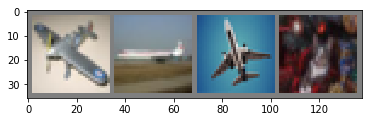

plane plane plane   cat


In [47]:
import matplotlib.pyplot as plt 
import numpy as np


def imshow(img):
    img = img / 2 + 0.5 # undo normalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

print(' '.join("%5s" % classes[labels[j]] for j in range(4)))

### 2. Define a Convolutional Neural Network

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5) # in_channels=3, out_channels=6, kernel size=5
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    


In [49]:
net = Net()

### 3. Define a Loss function and optimizer

In [50]:
import torch
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4. Train the network

In [52]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero gradient
        optimizer.zero_grad()
        
        # forward
        outputs = net(inputs)
        
        # loss
        loss = criterion(outputs, labels)
        
        # backward
        loss.backward()
        
        # update
        optimizer.step()
        
        # print something
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[epoch %d, iteration %5d] loss: %.3f' %
                 (epoch+1, i+1, running_loss/2000))
            running_loss = 0

[epoch 1, iteration  2000] loss: 2.202
[epoch 1, iteration  4000] loss: 1.873
[epoch 1, iteration  6000] loss: 1.686
[epoch 1, iteration  8000] loss: 1.605
[epoch 1, iteration 10000] loss: 1.526
[epoch 1, iteration 12000] loss: 1.505
[epoch 2, iteration  2000] loss: 1.407
[epoch 2, iteration  4000] loss: 1.364
[epoch 2, iteration  6000] loss: 1.334
[epoch 2, iteration  8000] loss: 1.321
[epoch 2, iteration 10000] loss: 1.313
[epoch 2, iteration 12000] loss: 1.296


### 5. Test the network on test data

first step. Let us display an image from the test set

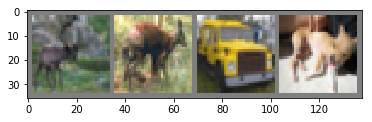

ground truth:   deer  deer truck   dog


In [53]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print("ground truth: ", ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Ok, let's see the prediction of model

In [54]:
output = net(images)

_, predicted = torch.max(output,1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   bird horse  frog   cat


Look at the performance on the whole dataset

In [55]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Accuracy of the network on the 10000 test images: %d %%" %
     (100*correct/total))

Accuracy of the network on the 10000 test images: 55 %


In [56]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 58 %
Accuracy of   car : 64 %
Accuracy of  bird : 49 %
Accuracy of   cat : 28 %
Accuracy of  deer : 36 %
Accuracy of   dog : 30 %
Accuracy of  frog : 67 %
Accuracy of horse : 67 %
Accuracy of  ship : 82 %
Accuracy of truck : 67 %


### 6. train on GPU

In [57]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [58]:
net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)

# Optional: Data Parallelism

device = torch.device("cuda:0")
model.to(device)

mytensor = my_tensor.to(device)

model = nn.DataParallel(model)

## imports and parameters

In [61]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Parameters and Dataloaders
input_size = 5
output_size = 2

batch_size = 30
data_size = 100


In [62]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Dummy DataSet

In [63]:
class RandomDataset(Dataset):
    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)
    
    def __getitem__(self, index):
        return self.data[index]
    
    def __len__(self):
        return self.len
    


In [64]:
rand_loader = DataLoader(dataset=RandomDataset(input_size, data_size),
                        batch_size=batch_size, shuffle=True)

## Simple model

In [65]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        
        self.fc = nn.Linear(input_size, output_size)
        
    def forward(self, input):
        output = self.fc(input)
        print("\tIn model: input size", input.size(), "output size", output.size())
        return output
    

## Create Model and DataParallel

This is the core part of the data parallel tutorial.
* First check if we have multiple GPUs
* Then use `nn.DataParallel` to wrap our model
* Last put model on GPUs by `model.to(device)`

In [67]:
print(torch.cuda.device_count())


0


In [68]:
model = Model(input_size, output_size)
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!")
    # This is the core part of section 5
    model = nn.DataParallel(model)
    
model.to(device)

Model(
  (fc): Linear(in_features=5, out_features=2, bias=True)
)

## Run the Model

In [70]:
for data in rand_loader:
    input = data.to(device)
    output = model(input)
    print("Outside: input size", input.size(),
          "output_size", output.size())

	In model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
	In model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
	In model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
	In model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])
